# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as stats
import seaborn as sns

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Chiga\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


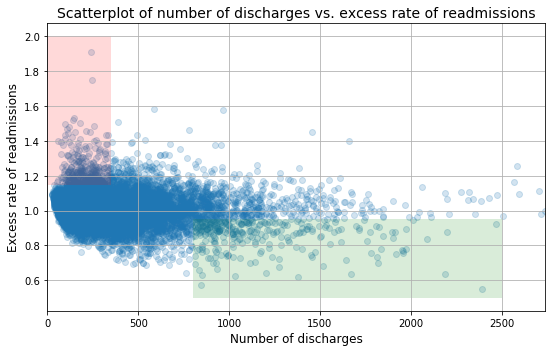

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A) Do you agree with the above analysis and recommendations? Why or why not?

I don't agree with the above analysis and recommendation. By looking at the plot given, there are more samples with less discharges clustered together than there are samples with more discharges. Although the mean readmission rate is greater for less discharges, there is less variability/variance with the data compared to hospitals with higher discharges. Statistically speaking, you're confidence interval is better with hospitals with less discharges than with more discharges. More analysis should be done to determine if there is a correlation between the number of discharges and excess readmission rates and any recommendations will be based on that analysis.

## B) Provide support for your arguments and your own recommendations with a statistically sound analysis

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

### 1) Setup an appropriate hypthesis test.

I want to test if the readmission rate for hospitals with a higher number of discharges is actually less than the readmission rate for hospitals with fewer number of discharges. I'll take the same conditions as the above analysis when considering hospitals with fewer and higher discharges, less than 100 and more than 1000 discharges respectively. To begin, I'll assume the following hypothesis:
   + $H_0$: The readmission rates between hospitals with higher and fewer discharges is the same, $rr_{high} = rr_{low}$.
   + $H_1$: The readmission rates between hospitals with higher and fewer discharges is not the same, $rr_{high} \neq rr_{low}$.

### 2) Compute and report the observed significance value (or p-value)

In [6]:
# Create a function that takes the bootstrap replicates of the mean of a set of numbers
'''Function takes a set of numbers and draws bootstrap samples and take the mean'''

def bs_rep_mean(data, size=1):
    np.random.seed(25)
    
    # Initialize an empty array
    reps = np.empty(size)
    
    # create for loop that calculates the mean of drawn samples
    for i in range(size):
        bs_samples = np.random.choice(data, size=len(data))
        reps[i] = np.mean(bs_samples)
        
    return reps

In [7]:
# Assign hospitals with fewer than 100 discharges to lower and more than 1000 to higher
# The slice [81:-3] was done in the plots above to remove 0's and outliers which will also be done here
lower = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 100) & 
                               (clean_hospital_read_df['Number of Discharges'] > 0)]['Excess Readmission Ratio']
higher = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000][:-3]['Excess Readmission Ratio']

# Take the average readmission rate of lower and higher
rr_lower = np.mean(lower)
rr_higher = np.mean(higher)

# Take average of both 'rr_lower' and 'rr_higher'
concatenated = np.concatenate((lower, higher))
concat_mean = np.mean(concatenated)

# Shift 'lower' and 'higher' values to simulate the null hypothesis;mean excess readmission rates are the same
lower_shifted = lower - rr_lower + concat_mean
higher_shifted = higher - rr_higher + concat_mean

# Perform a two-sample bootstrap sample of the means
lower_shifted_bs = bs_rep_mean(lower_shifted, size=10000)
higher_shifted_bs = bs_rep_mean(higher_shifted, size=10000)

# Create an array that takes the difference between both bootstrap replicate arrays
bs_difference = lower_shifted_bs - higher_shifted_bs

# Calculate the observed difference in excess readmission rates
obs_diff = np.abs(rr_lower - rr_higher)
print('The observed difference between means is %f' % obs_diff)

# Calculate the p-value
p_value = np.sum(bs_difference >= obs_diff)/len(bs_difference)
print(p_value)

The observed difference between means is 0.043545
0.0


With the bootstraps method, I got a p-value of 0, meaning under the hypothesis that the excess readmission rates are the same, after 10000 simulations of the data, we didn't see a single observation where the difference in excess readmission rates were as extreme as the original observed difference.

To be certain, I'll reproduce the p-value with a t-test.

In [8]:
# Conduct t-test with the observed data
ttest_stats = stats.ttest_ind(lower, higher, equal_var=False)
print(ttest_stats)

Ttest_indResult(statistic=7.490062060325073, pvalue=2.7928704570174404e-13)


It may also be useful to determine what our confidence intervals our for each category of hospital by the number of discharges.

In [9]:
# Take bootstrap replicates of mean of original 'lower' and 'higher'
bs_lower = bs_rep_mean(lower, size=10000)
bs_higher = bs_rep_mean(higher, size=10000)

# Calculate the average mean for 'bs_lower' and 'bs_higher'
bs_lower_mean = np.mean(bs_lower)
bs_higher_mean = np.mean(bs_higher)

# Compute the standard error for both bootstrap replicate data
bs_lower_std = np.std(bs_lower)
bs_higher_std = np.std(bs_higher)

# Define margin of error for 'lower' and 'higher' with 99% confidence
sem_lower = 2.576 * bs_lower_std
sem_higher = 2.576 * bs_higher_std

# Define a confidence interval of 99% for both 'lower' and 'higher'
lower_confid_inter = (bs_lower_mean - sem_lower, bs_lower_mean + sem_lower)
higher_confid_inter = (bs_higher_mean - sem_higher, bs_higher_mean + sem_higher)

print('The confidence interval for hospitals with lower discharges is', lower_confid_inter)
print('The confidence interval for hospitals with higher discharges is', higher_confid_inter)
print('The difference between the lower bound of hospitals with lower discharges and the upper bound of',
      'hospitals with higher discharges is %f' % (lower_confid_inter[0] - higher_confid_inter[1]))

The confidence interval for hospitals with lower discharges is (1.0182873255869438, 1.0269876550191166)
The confidence interval for hospitals with higher discharges is (0.9650223251254024, 0.9933978654832933)
The difference between the lower bound of hospitals with lower discharges and the upper bound of hospitals with higher discharges is 0.024889


### 3) Report statistical significance for $\alpha = 0.1$


Through multiple statistical methods, it's demonstrated that there's a difference between the readmission rates of hospitals with less than 100 discharges and hospitals with more than 1000 discharges. My bootstrap method didn't yield a single occurance of a difference in means at as large as the observed by the data. A t-test was then conducted and, given an alpha of 0.01, the calculated p-value was small enough to reject our null hypothesis that readmission rates were the same. This was backed up by a calculated 99% confidence interval of the means for hospitals with high and low discharges. The upper bound of the mean readmission rate for hospitals with more than 1000 discharges was 0.025 less than the lower bound of the mean readmission rate for hospitals with less than 100 discharges.

### 4) Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistically speaking, there is a difference between the excess readmission rates of hospitals with less than 100 discharges and more than 1000 discharges. Both means are very close to 1 considering hospitals with more than 1000 discharges is between $(0.965, 0.993)$ and hospitals with less than 100 discharges is between $(1.018, 1.027)$. Practically, both readmission rates are close to 1 that they might be indistinguishable as having excess readmissions. The previous recommendation called for regulations for small capacity hospitals to demonstrate quality care for continued operation and consolidate hospitals so there's less hospitals with a high number of discharges. The difference in readmission rates may not warrant such drastic reallocation of resources but outliers and extreme cases may need to be regulated.

### 5) Look at the scatterplot above.
#### What are the advantages and disadvantages of using this plot to convey information?
#### Construct another plot that conveys the same information in a more direct manner.

The plot used above is nice to see the distribution of hospitals and highlights specific areas but it's hard to see what the colored areas represent because they aren't labeled and why those cut-off points were chosen. It forces the reader to read the analysis to understand what the graph and colored areas represent. Initially, they wanted to show the downward trend of readmission rates as the number of discharges increases. The red area highlights of excess readmission rates with lower discharges and the green area highlights lower readmission rates with higher discharges.

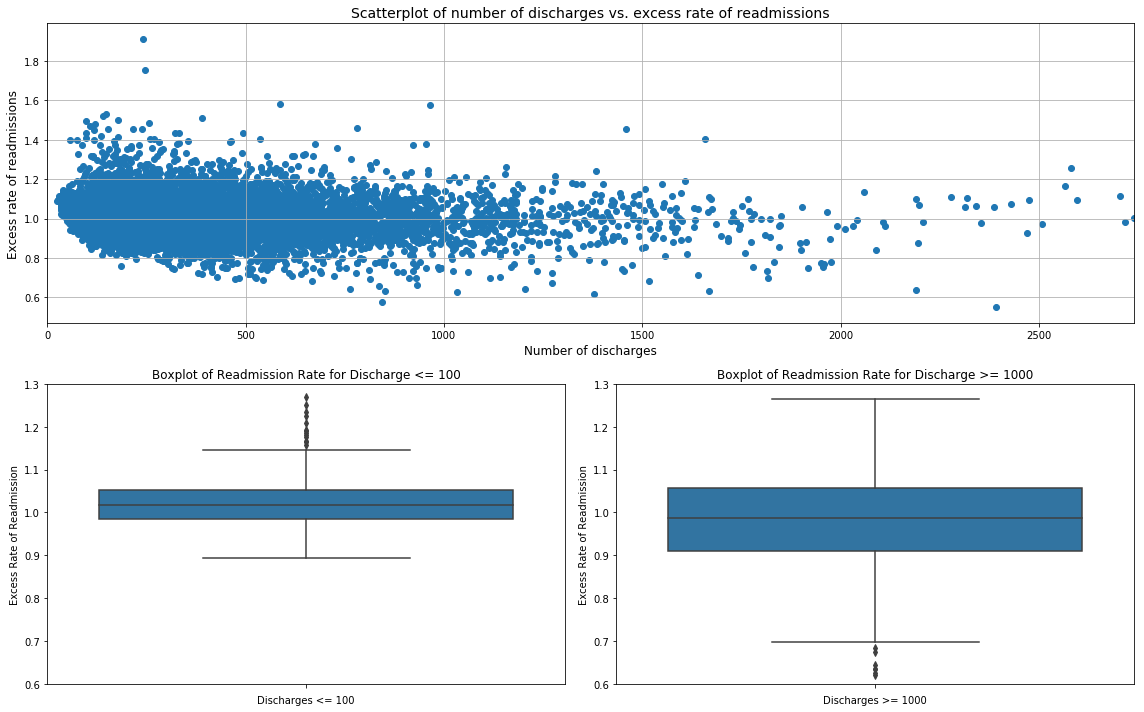

In [41]:
excess_readmit_ratio = np.array(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])
discharges = np.array(clean_hospital_read_df['Number of Discharges'][81:-3])

fig, ax = plt.subplots(figsize = (16, 10))

plt.subplot2grid((4, 2), (0, 0), colspan=2, rowspan=2)
plt.scatter(x = discharges, y = excess_readmit_ratio)
plt.xlim([0, max(x)])
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
plt.grid(True)

plt.subplot2grid((4, 2), (2, 0), rowspan=2)
sns.boxplot(excess_readmit_ratio[discharges <= 100], orient='v')
plt.title('Boxplot of Readmission Rate for Discharge <= 100')
plt.ylim([0.6, 1.3])
plt.xlabel('Discharges <= 100')
plt.ylabel('Excess Rate of Readmission')

plt.subplot2grid((4, 2), (2, 1), rowspan=2)
sns.boxplot(excess_readmit_ratio[discharges >= 1000], orient='v')
plt.title('Boxplot of Readmission Rate for Discharge >= 1000')
plt.ylim([0.6, 1.3])
plt.xlabel('Discharges >= 1000')
plt.ylabel('Excess Rate of Readmission')

plt.tight_layout()
plt.show()